In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

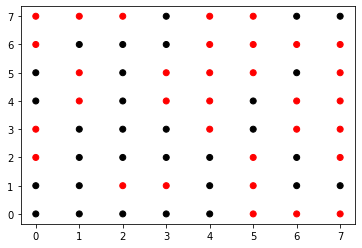

In [11]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')
plot_grid(narr)

In [12]:
def step(current, size):
    walk = []
    for i in range(size):
        for j in range(size):
            if current[i, j] or ((i == 0 or not current[i - 1, j]) and (j == 0 or not current[i, j - 1]) and (i == size - 1 or not current[i + 1, j]) and  (j == size - 1 or not current[i, j + 1])):
                walk.append((i, j))

    place = walk[np.random.randint(0, len(walk))]
    
    next_ = np.array(current)
    next_[place[0], place[1]] = not current[place[0], place[1]]

    new_walk = []
    for i in range(size):
        for j in range(size):
            if current[i, j] or ((i == 0 or not current[i - 1, j]) and (j == 0 or not current[i, j - 1]) and (i == size - 1 or not current[i + 1, j]) and  (j == size - 1 or not current[i, j + 1])):
                new_walk.append((i, j))
    
    if np.random.uniform() > len(walk)/len(new_walk):
        return current
    return next_

In [13]:
size = 8
current = np.zeros(size*size).reshape(size,size)
walk = []
for i in range(10000):
    current = step(current, size)
    walk.append((abs(current)).sum())
np.array(walk).mean()

15.1038

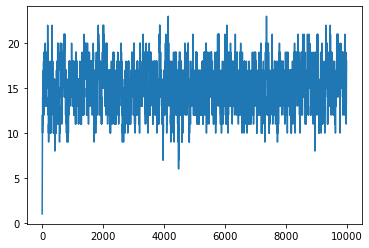

Ttest_indResult(statistic=-4.713770728641204, pvalue=2.698170609234234e-06)

In [14]:
from scipy import stats
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

plt.plot(walk)
plt.show()

g_test(walk)

In [15]:
g_test(walk[3333:])

Ttest_indResult(statistic=-2.0883234566107736, pvalue=0.037047893437259505)

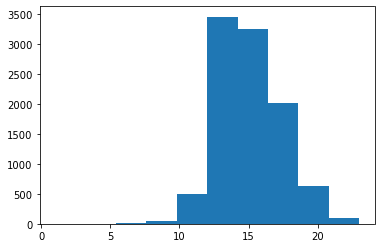

In [16]:
plt.hist(walk)
plt.show()